In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [6]:
def load_img():
    blank_img = np.zeros((600,600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img,text = 'TEST', org = (50,300), fontFace = font, fontScale=5, color =(255,255,255),thickness=25,lineType=cv2.LINE_AA)
    return blank_img

In [7]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

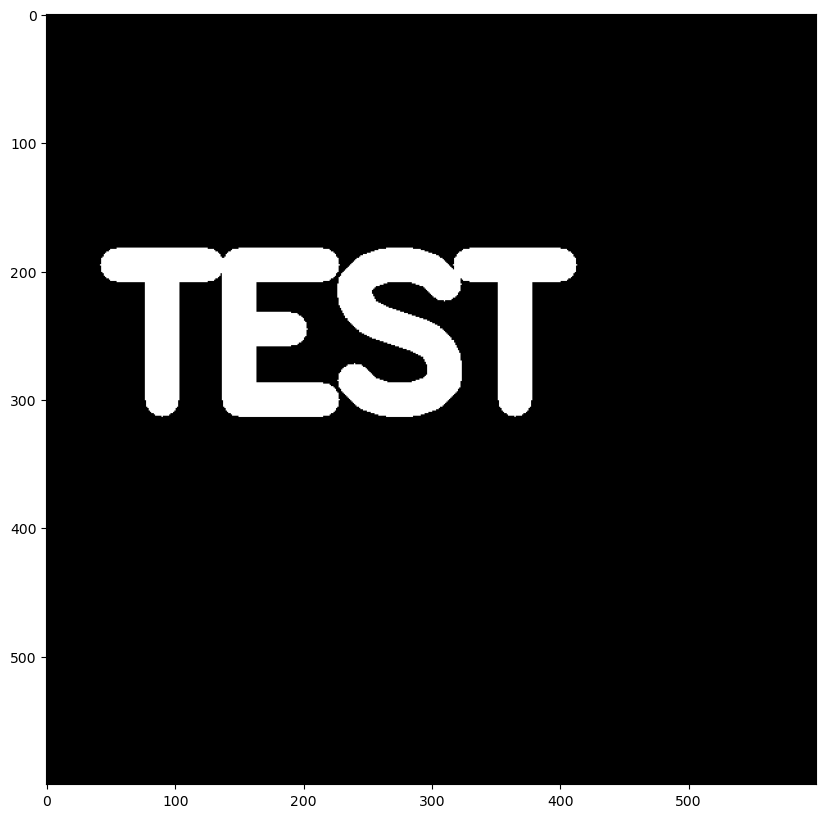

In [8]:
img = load_img()
display_img(img)

In [11]:
kernel = np.ones((5,5), dtype = np.uint8)
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

## Erosion

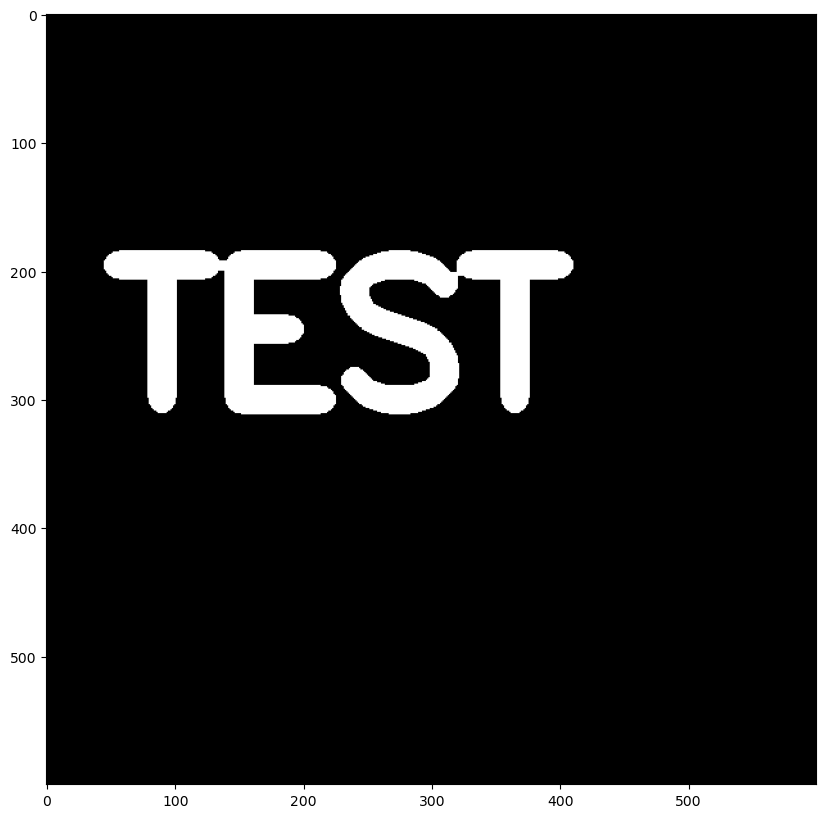

In [16]:
# Lets use erosion
result= cv2.erode(img,kernel,iterations=1)
display_img(result)

## Opening 

Opening is erosion followed by dilation. Useful in removing background noise!

In [19]:
img.max()

255.0

In [38]:
white_noise = np.random.randint(low = 0, high = 2, size=(600,600))
white_noise = white_noise * 255

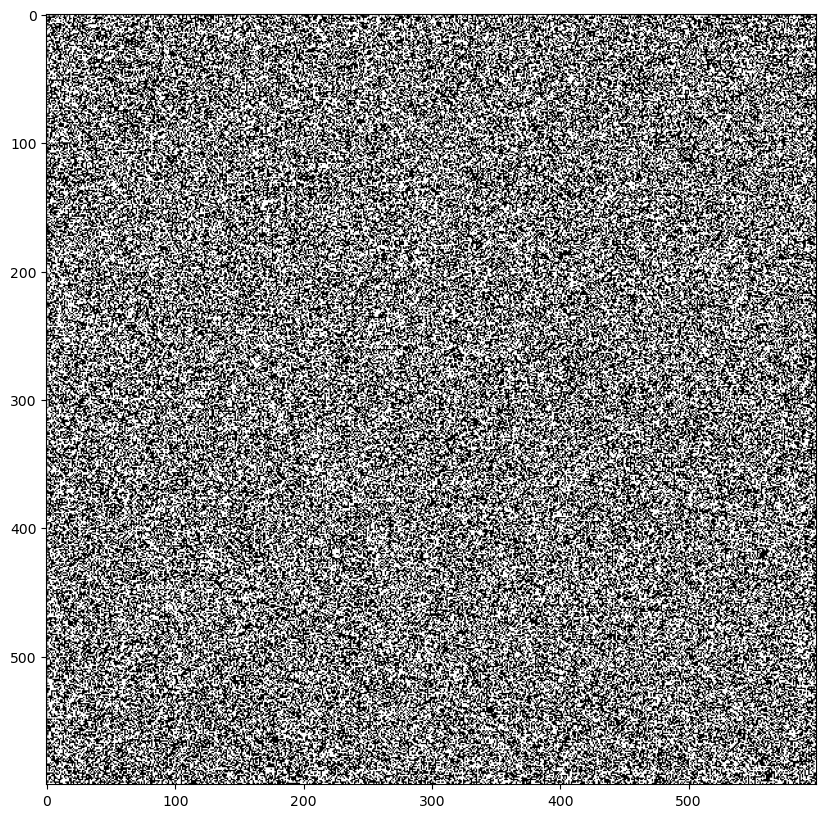

In [39]:
display_img(white_noise)

In [40]:
#show noise as a matrix
white_noise

array([[255,   0, 255, ...,   0, 255,   0],
       [255, 255,   0, ..., 255,   0,   0],
       [  0,   0,   0, ...,   0, 255, 255],
       ...,
       [255,   0, 255, ...,   0,   0, 255],
       [  0,   0, 255, ..., 255, 255,   0],
       [  0, 255, 255, ..., 255, 255,   0]])

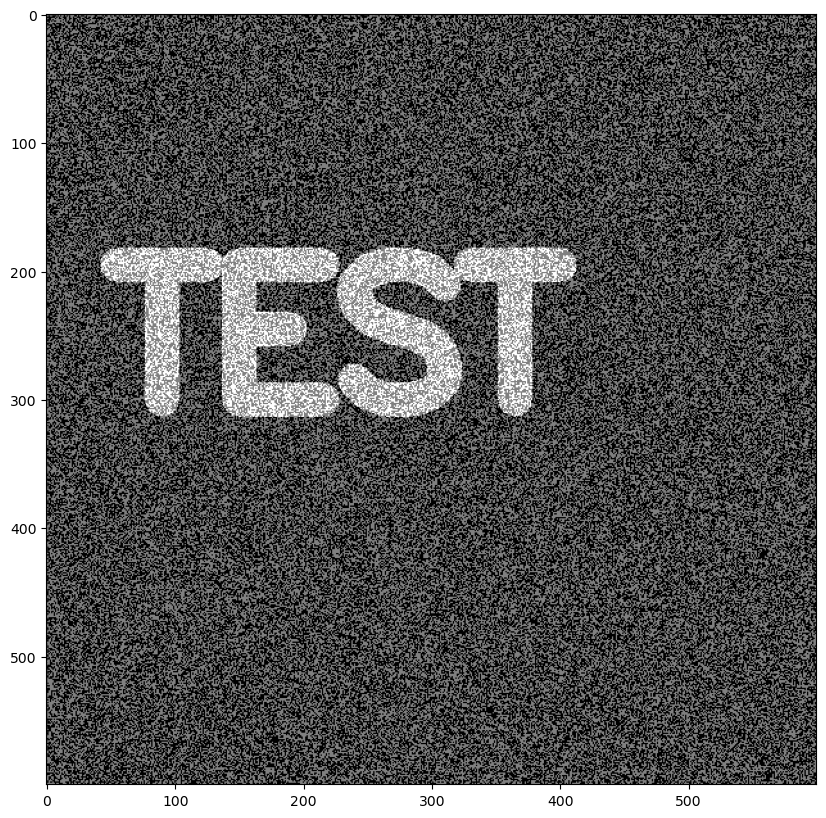

In [41]:
# We create the noisy image from these last two images
noise_img = white_noise + img
display_img(noise_img)

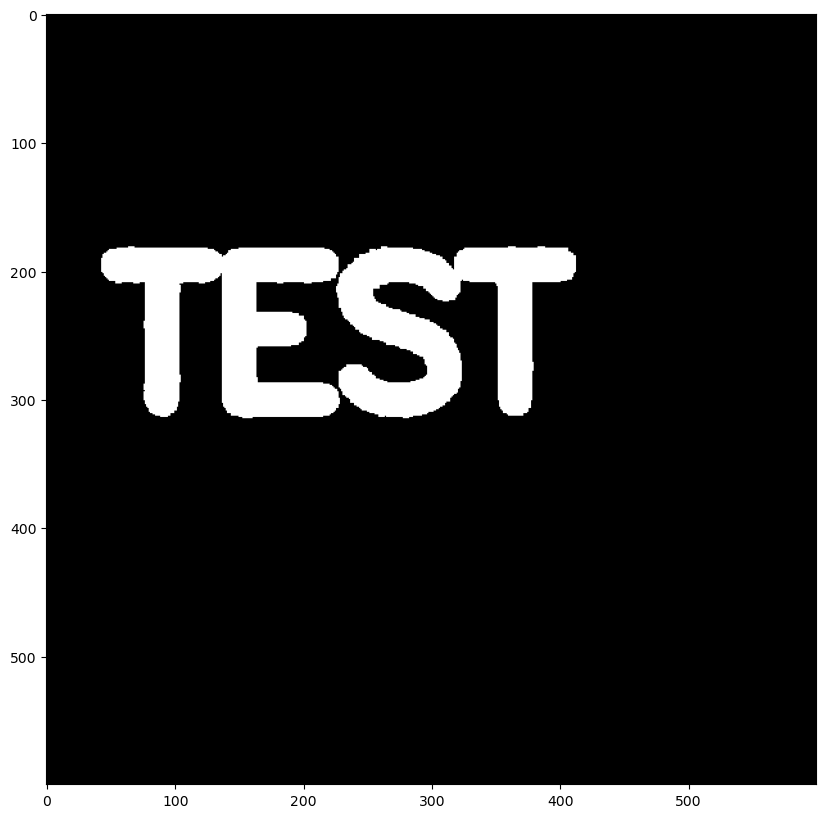

In [43]:
# Lets use the opening operators
opening = cv2.morphologyEx(noise_img,cv2.MORPH_OPEN, kernel)
display_img(opening)

## Closing 

Useful in removing noise from foreground objects, such as black dots on top of the white text.

In [45]:
# Reload. the image again 
img = load_img()

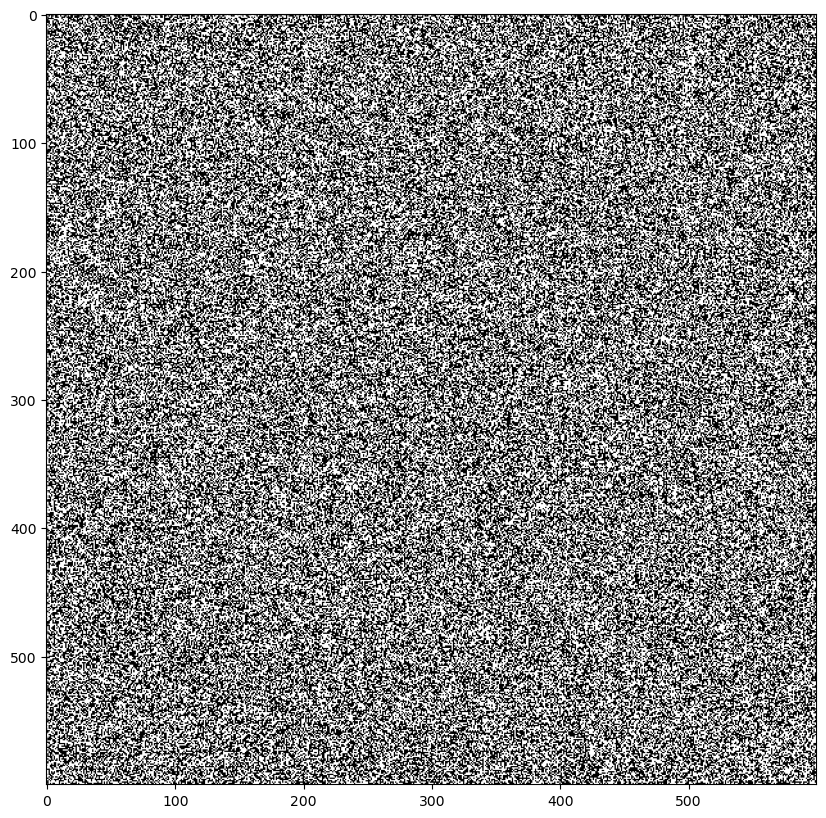

In [54]:
# Create the black noise
black_noise = np.random.randint(low=0, high=2, size =(600,600))
display_img(black_noise)

In [55]:
black_noise = black_noise * -255
black_noise_img = img + black_noise

In [56]:
black_noise_img

array([[-255.,    0.,    0., ...,    0., -255.,    0.],
       [   0., -255.,    0., ..., -255.,    0., -255.],
       [-255.,    0., -255., ..., -255.,    0., -255.],
       ...,
       [-255.,    0., -255., ..., -255., -255.,    0.],
       [   0.,    0., -255., ..., -255., -255.,    0.],
       [-255.,    0., -255., ..., -255., -255., -255.]])

In [57]:
black_noise_img[black_noise_img==-255] = 0

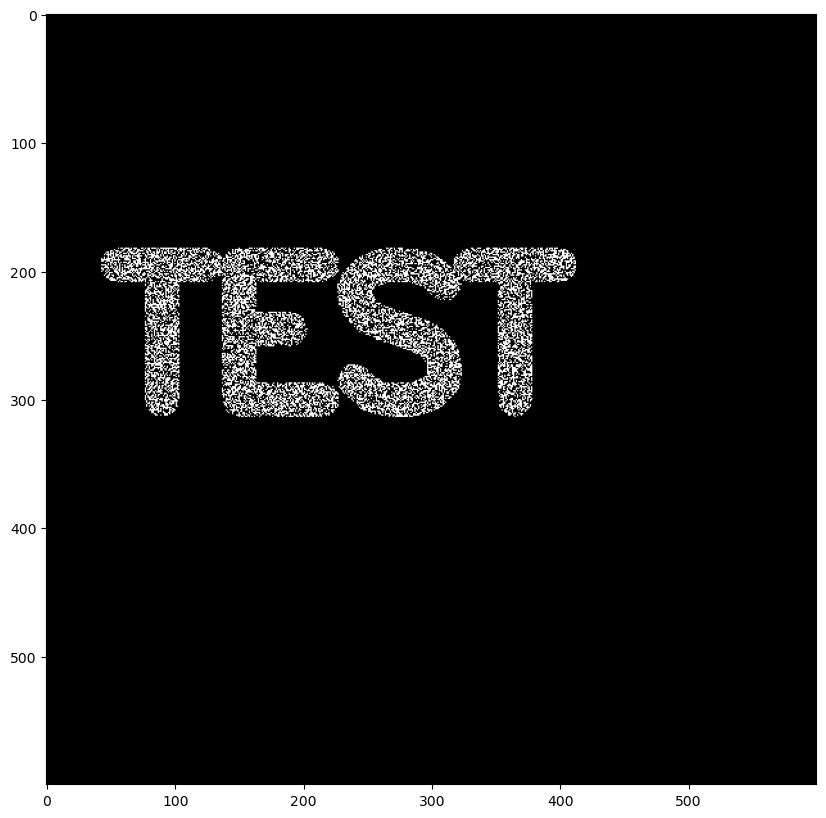

In [59]:
display_img(black_noise_img)

In [60]:
closing = cv2.morphologyEx(black_noise_img, cv2.MORPH_CLOSE, kernel)

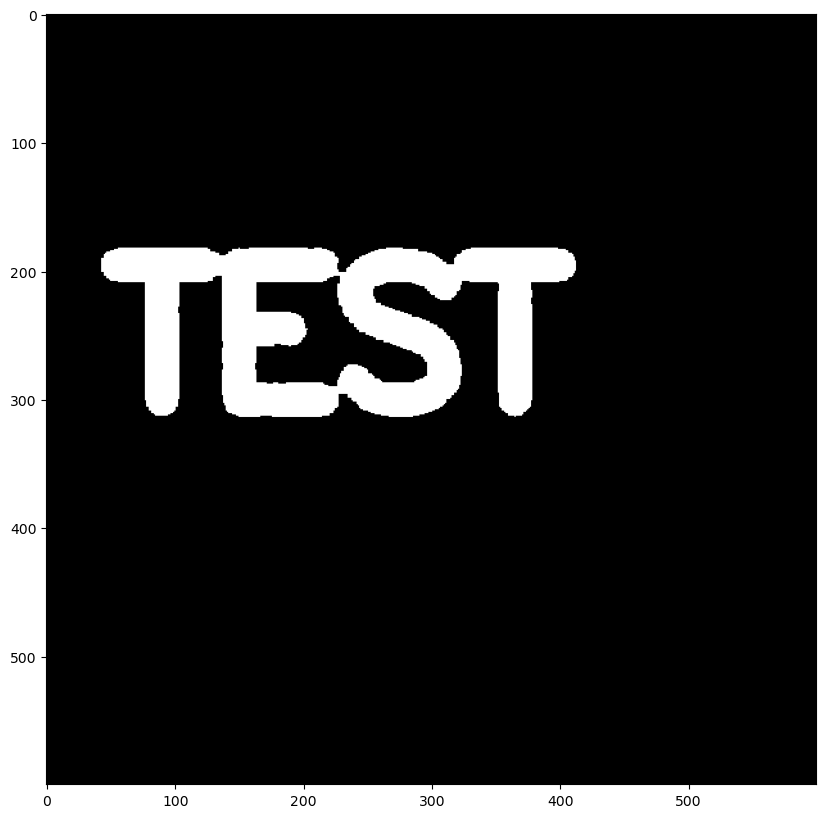

In [61]:
display_img(closing)

## Morphological Gradient

Difference between dilation and erosion of an image.

In [63]:
# Reload the image 
img = load_img()

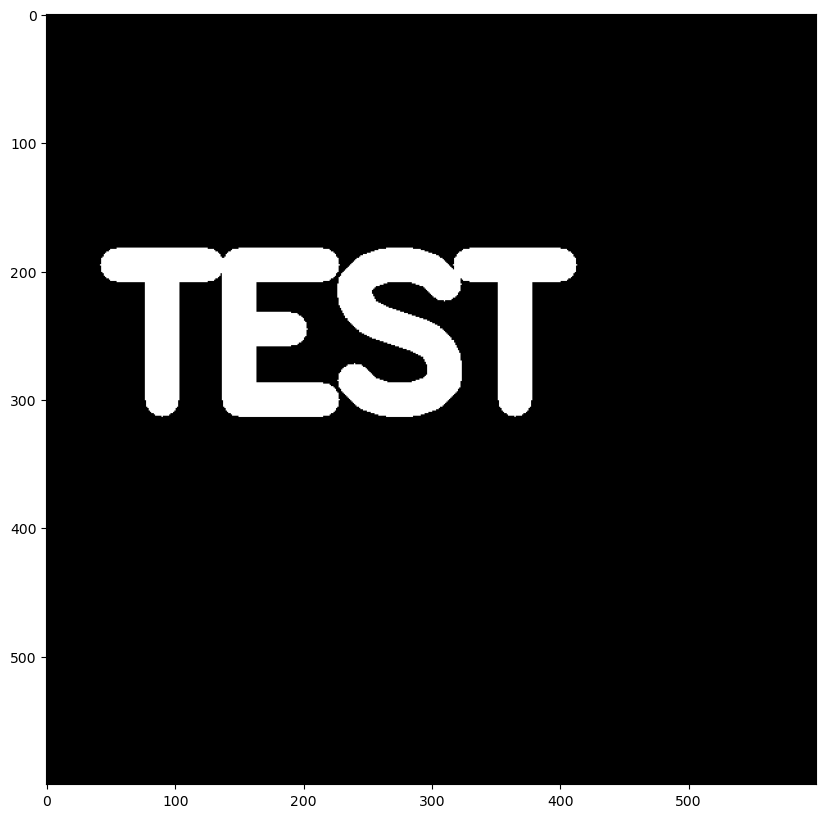

In [64]:
display_img(img)

In [65]:
gradient = cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel)

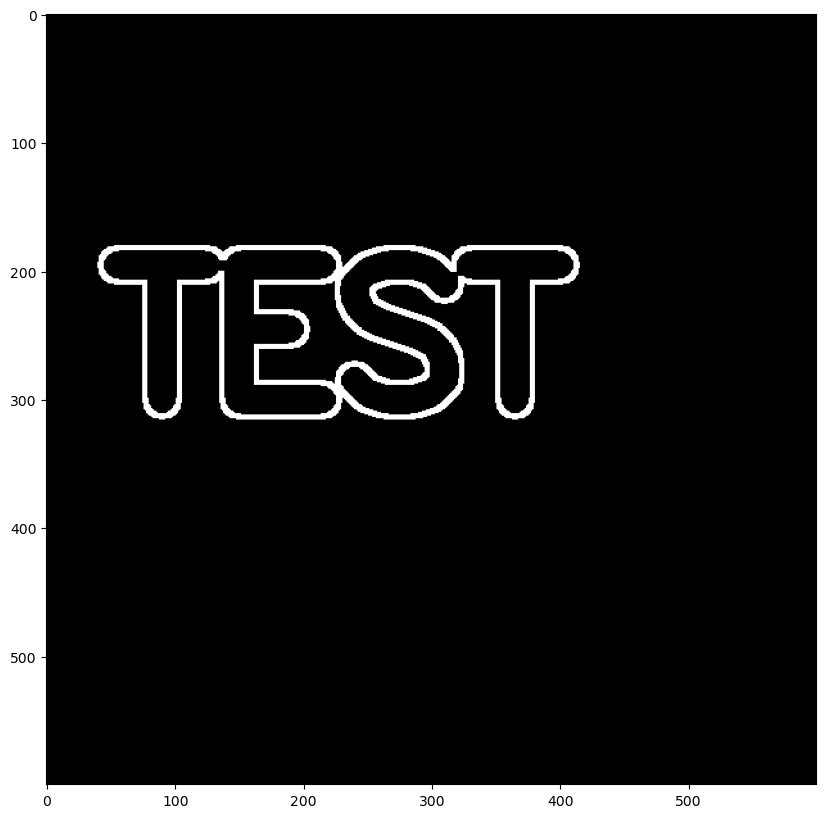

In [66]:
display_img(gradient)

## Some example for kiwi image:

In [67]:
kiwi = cv2.imread('images/wb_kiwi.png')

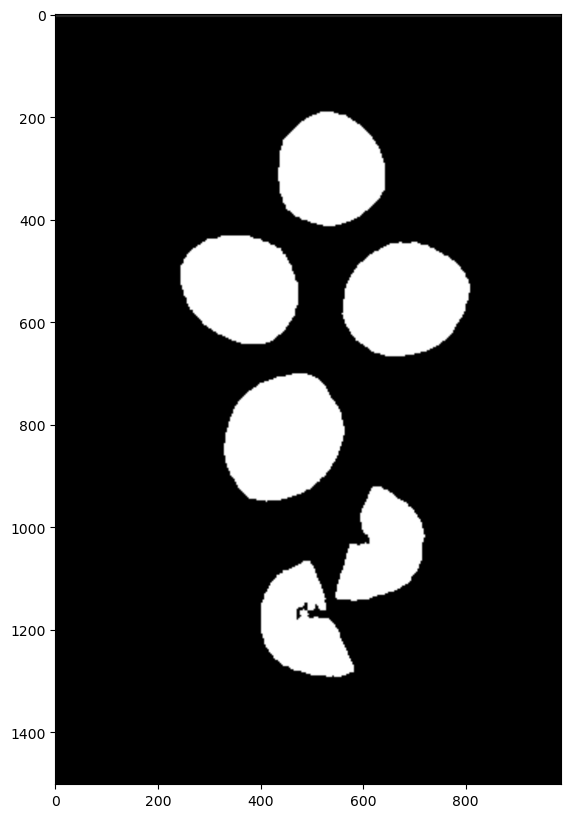

In [68]:
display_img(kiwi)

In [69]:
closing_result = cv2.morphologyEx(kiwi, cv2.MORPH_CLOSE, kernel)

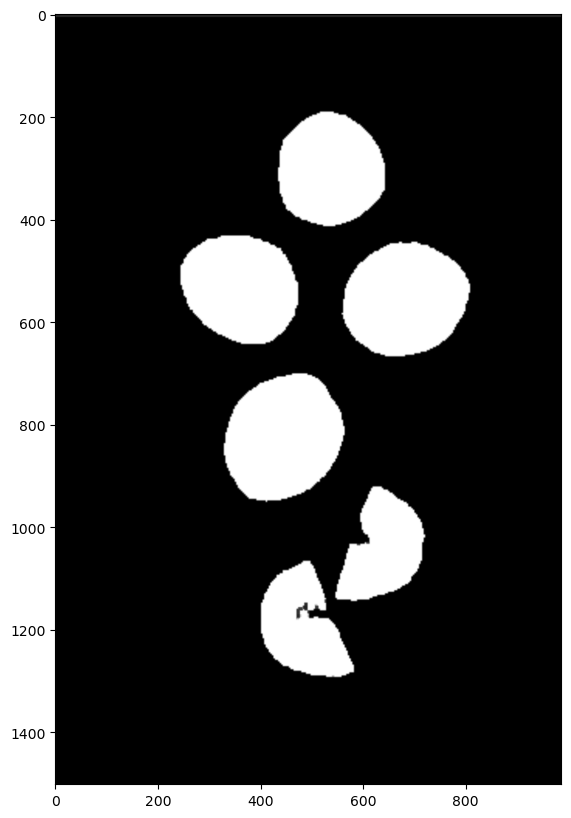

In [70]:
display_img(closing_result)

In [89]:
dilation_kiwi = cv2.dilate(kiwi,kernel,iterations = 6)

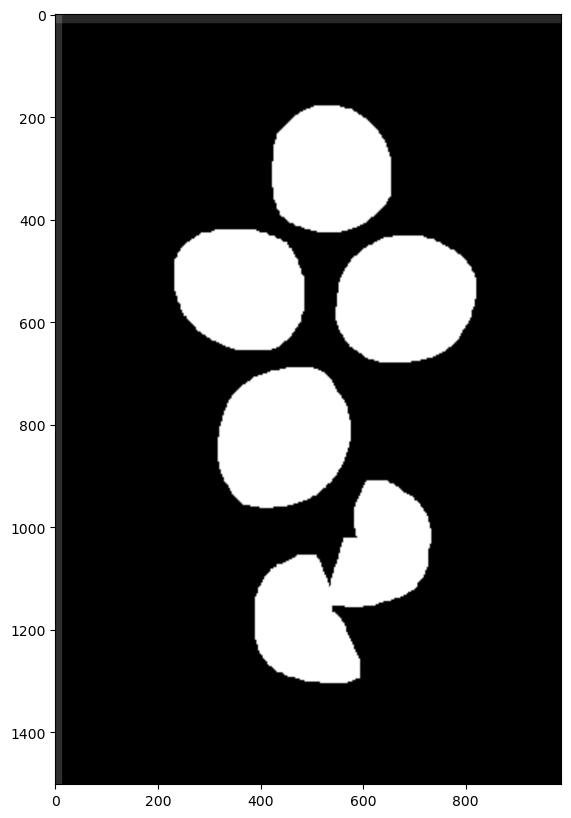

In [90]:
display_img(dilation_kiwi)

In [91]:
erosion_kiwi = cv2.erode(dilation_kiwi,kernel,iterations = 6)

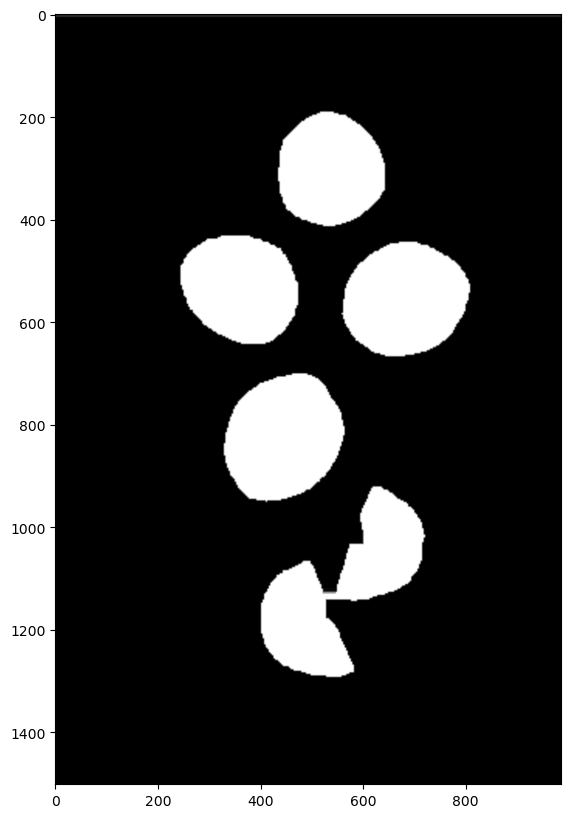

In [92]:
display_img(erosion_kiwi)